In [2]:
!pip show plotnine

Name: plotnine
Version: 0.5.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\anaconda3\lib\site-packages
Requires: mizani, scipy, statsmodels, patsy, pandas, numpy, matplotlib, descartes
Required-by: 


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
from plotnine import *

In [4]:
%pwd

'c:\\BigData\\Opendata'

In [8]:
pre_sale = pd.read_csv('C://BigData/Opendata/apt_price/pre_sale_2018.7_1.csv' ,encoding='utf-8')
pre_sale.shape

(2890, 5)

In [9]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [12]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [11]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [15]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [17]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

In [19]:
import missingno as msno
from matplotlib import font_manager,rc
path = "C://Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

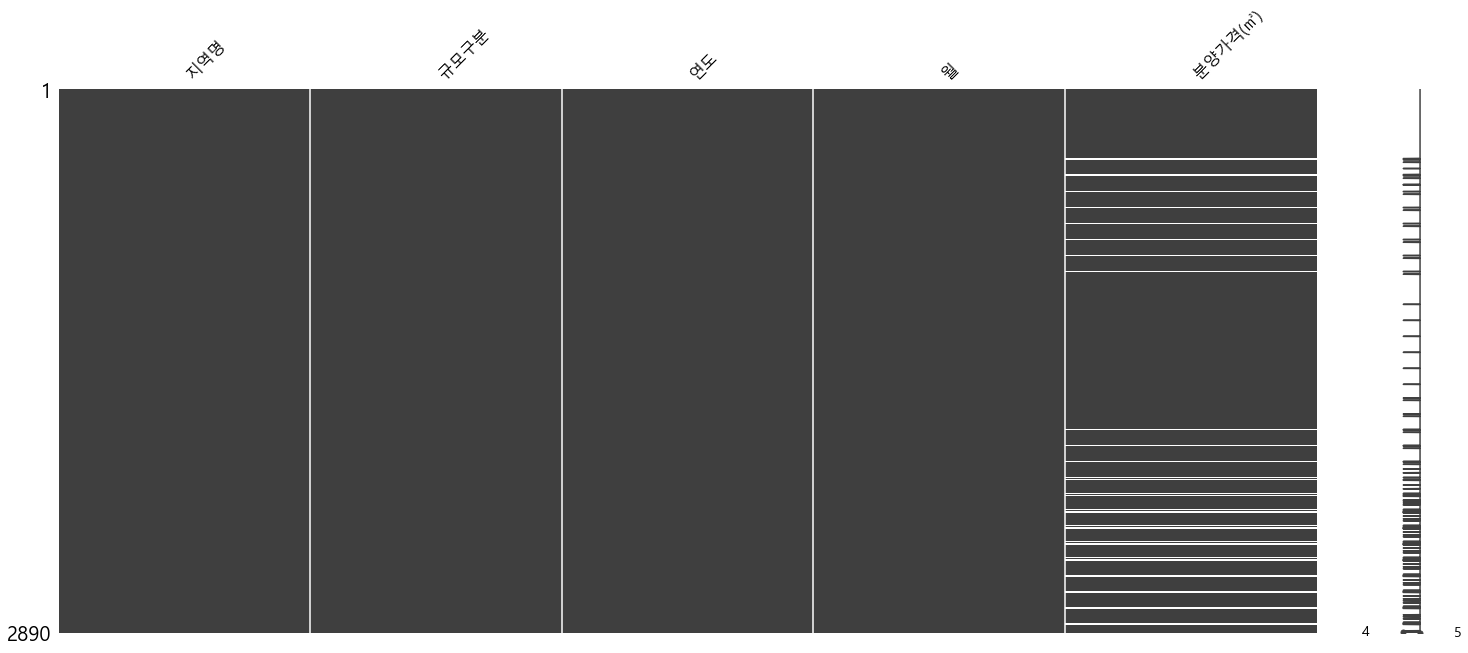

In [20]:
msno.matrix(pre_sale)

In [21]:
pre_sale['연도'] = pre_sale['연도'].astype(str)

In [22]:
pre_sale['월'] = pre_sale['월'].astype(str)

In [23]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
dtypes: object(5)
memory usage: 113.0+ KB


In [25]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [26]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [27]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [30]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [31]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [32]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [34]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,광주,전용면적 102㎡초과,2017,11,2221
freq,170,578,1020,255,17
